벡터 $[0,1,2,3,4,5,6,7,8]$를 먼저 만들고 $3 \times 3$행렬로 reshape을 합니다.

In [4]:
import numpy as np
# x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8])
# y = x.reshape(3, 3)
x = np.arange(9).reshape(3, 3)
print(x)

[[0 1 2]
 [3 4 5]
 [6 7 8]]


$3 \times 3$ 행렬에 숫자 1을 더하라고 하면 numpy는 모든 항에 1을 더하라는 뜻으로 받아들입니다.

In [5]:
# 브로드캐스팅 이용
x += 1
print(x)


[[1 2 3]
 [4 5 6]
 [7 8 9]]


$3 \times 3$ 행렬에 행벡터 $[1,2,3]$을 더하라고 하면 numpy는 각 행에 행벡터 $[1,2,3]$을 더하라는 뜻으로 받아들입니다.

In [6]:
# 브로드캐스팅 이용
# x += [1, 2, 3]
x += np.array([1, 2, 3])
print(x)


[[ 2  4  6]
 [ 5  7  9]
 [ 8 10 12]]


$3 \times 3$ 행렬에 열벡터 $\begin{bmatrix}1\\2\\3\end{bmatrix}$을 더하라고 하면 numpy는 각 열에 열벡터 $\begin{bmatrix}1\\2\\3\end{bmatrix}$을 더하라는 뜻으로 받아들입니다.

In [9]:
# 브로드캐스팅 이용
# x += [[1], [2], [3]]
x += np.array([1, 2, 3]).T
print(x)

[[ 5 10 15]
 [ 8 13 18]
 [11 16 21]]


### mnist_show.py를 수정하여 2,3,4번째 변형된 이미지가 출력되도록 하시오.  

![image-4.png](attachment:image-4.png)

In [10]:
import sys
sys.path.append('./deep-learning-from-scratch-master/') # 각자의 경로로 수정해주세요.

컴퓨터가 이미지를 이해하는 방식은 행렬입니다.

In [12]:
import numpy as np
from dataset.mnist import load_mnist

np.set_printoptions(linewidth=200,threshold=1000)

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False, normalize=False)

x = x_train[0][0]

print(x)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

행렬의 항들은 픽셀의 밝기를 나타냅니다.  
$255 - [x_{i,j}]$은 스칼라 빼기 행렬이라서 수학에서는 잘못된 표현이지만 파이썬은 $[255 - x_{i,j}]$로 이해합니다.  
어두운 픽셀은 밝아지고 밝은 픽셀은 어두워집니다.

In [3]:
ax = 255 - x
print(ax)

[[255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 252 237 237 237 129 119  80 229  89   0   8 128 255 255 255 255]
 [255 255 255 255 255 255 255 255 225 219 161 101  85   2   2   2   2   2  30  83   2  13  60 191 255 255 255 255]
 [255 255 255 255 255 255 255 206  17   2   2   2   2   2   2   2   2   4 162 173 173 199 216 255 255 255 255 255]
 [255 255 255 255 255 255 255 237  36   2   2   2   2   2  57  73   8  14 255 25

이미지를 대각선으로 뒤집는 변환은 선형대수학 관점에서는 transpose입니다.

In [13]:
bx = x.T
print(bx)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  55 136   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 172 253   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  18 226 253   0   0   0]
 [  0   0   0   0   0   0   0  49  18   0   0   0   0   0   0   0   0   0   0   0   0   0 171 253 253   0   0   0]
 [  0   0   0   0   0   0  30 238 219  80   0   0   0   0   0   0   0   0   0   

$128 - [x_{i,j}]$은 스칼라 빼기 행렬이라서 수학에서는 잘못된 표현이지만 파이썬은 $[128 - x_{i,j}]$로 이해합니다.  
255를 넘어가거나 0보다 작게 되면 시계방식 (modulo 방식)으로 0부터 255로 맞춰줍니다.  
어두운 픽셀과 밝은 픽셀은 1회색이 됩니다.  
회색 픽셀은 128보다 좀 작으면 어두운 색으로 128보다 좀 크면 밝은색이 됩니다.

In [22]:
cx = 128 - x
print(cx)

[[128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128]
 [128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128]
 [128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128]
 [128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128]
 [128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128]
 [128 128 128 128 128 128 128 128 128 128 128 128 125 110 110 110   2 248 209 102 218 129 137   1 128 128 128 128]
 [128 128 128 128 128 128 128 128  98  92  34 230 214 131 131 131 131 131 159 212 131 142 189  64 128 128 128 128]
 [128 128 128 128 128 128 128  79 146 131 131 131 131 131 131 131 131 133  35  46  46  72  89 128 128 128 128 128]
 [128 128 128 128 128 128 128 110 165 131 131 131 131 131 186 202 137 143 128 12

28×28 해상도의 검정 사진을 먼저 만든후 i열에 원본 이미지의 오른쪽으로부터 세서 i열을 복사합니다.  
결과적으로 좌우 반전 시킨 행렬이 됩니다.

In [17]:
x1 = np.zeros((28,28), dtype=int)
for i in range(28):
    x1[:,i] = x[:,28 - (i + 1)]
print(x1)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 127 247 255 166  26 175 136 126  18  18  18   3   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0  64 195 242 253 172 225 253 253 253 253 253 170 154  94  36  30   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  39  56  82  82  93 251 253 253 253 253 253 253 253 253 238  49   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 241 247 182 198 253 253 253 253 253 21

28×28 해상도의 검정 사진을 먼저 만든후 i행에 원본 이미지의 아래로부터 세서 i행을 복사합니다.  
결과적으로 상하 반전 시킨 행렬이 됩니다.

In [18]:
x2 = np.zeros((28,28), dtype=int)
for i in range(28):
    x2[i,:] = x[28 - (i + 1),:]
print(x2)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 136 253 253 253 212 135 132  16   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0  55 172 226 253 253 253 253 244 133  11   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  18 171 219 253 253 253 253 195  80   9   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  23  66 213 253 253 253 253 198  81   2   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  24 114 221 253 253 253 253 201  78   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  39 148 229 253 253 253 250 18

따라서, 마지막 줄 코드 img_show(img)를 간단히 img_show(255 - img)와 img_show(img.T)로 수정해주면 두번째와 세번째 이미지를 각각 얻을수 있습니다.

주피터 노트북에서 이미지를 출력하기 위해서 PIL 라이브러리 대신 plt.imshow를 사용하겠습니다.

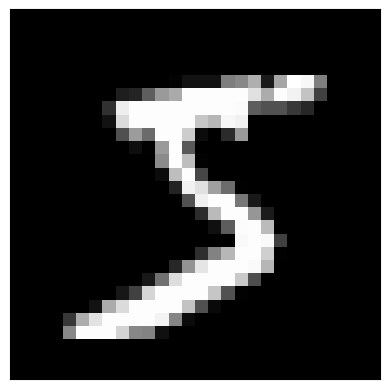

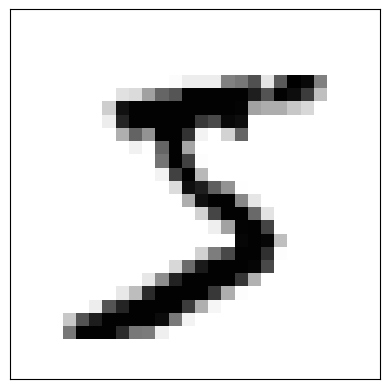

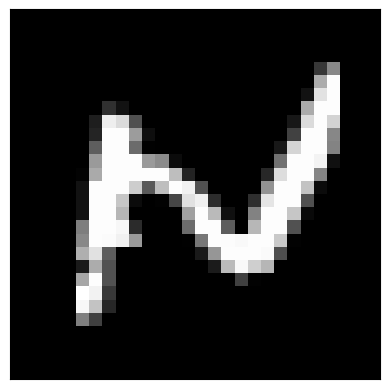

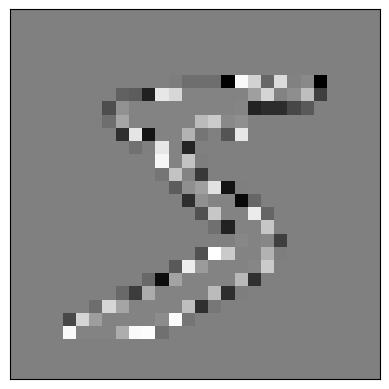

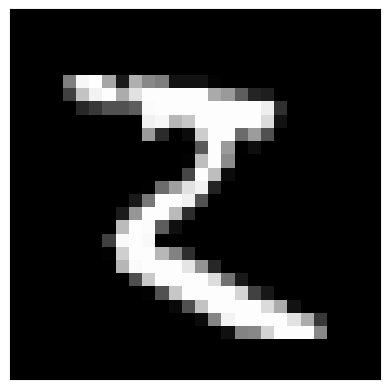

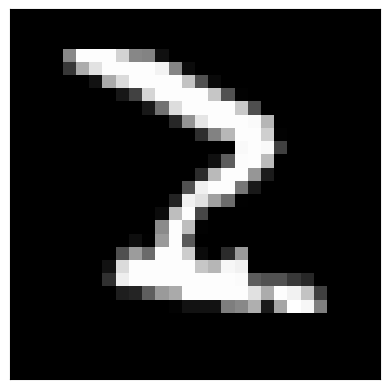

In [14]:
import matplotlib.pyplot as plt

x = x_train[0][0]

plt.imshow(x, cmap=plt.cm.gray)
plt.xticks([])
plt.yticks([])
plt.show()

plt.imshow(255 - x, cmap=plt.cm.gray)
plt.xticks([])
plt.yticks([])
plt.show()

plt.imshow(x.T, cmap=plt.cm.gray)
plt.xticks([])
plt.yticks([])
plt.show()

plt.imshow(128 - x, cmap=plt.cm.gray)
plt.xticks([])
plt.yticks([])
plt.show()

x1 = np.zeros((28,28), dtype=int)
for i in range(28):
    x1[:,i] = x[:,27-i]
plt.imshow(x1, cmap=plt.cm.gray)
plt.xticks([])
plt.yticks([])
plt.show()

x2 = np.zeros((28,28), dtype=int)
for i in range(28):
    x2[i,:] = x[27-i,:]
plt.imshow(x2, cmap=plt.cm.gray)
plt.xticks([])
plt.yticks([])
plt.show()

### 적절한 5 X 5 행렬에 `plt.imshow`를 적용하여 다음 여섯 이미지를 출력하시오. (cmap=plt.cm.gray)
![image.png](attachment:image.png)

작은 사각형 하나 하나가 픽셀입니다. $5 \times 5$ 해상도 이미지네요.
밝기의 패턴을 보고 $5 \times 5$ 행렬을 만듭니다.

In [15]:
# x = np.zeros((5, 5), dtype=int)
x = np.arange(25).reshape(5, 5)
print(x)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]


plt.imshow를 이용해 행렬을 이미지로 변환합니다.

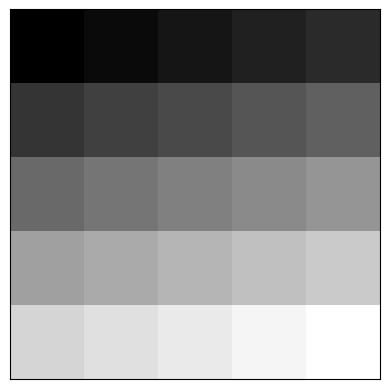

In [16]:
plt.imshow(x,cmap=plt.cm.gray)
plt.xticks([])
plt.yticks([])
plt.show()

transpose를 합니다.

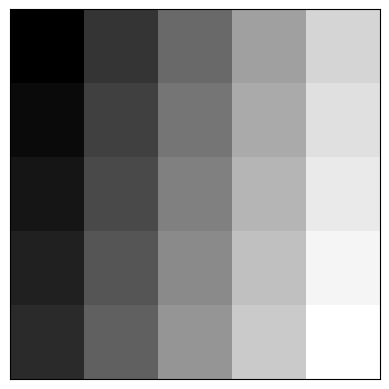

In [17]:
plt.imshow(x.T,cmap=plt.cm.gray)
plt.xticks([])
plt.yticks([])
plt.show()

밝은 픽셀은 어둡게 어두운 픽셀은 밝게 뒤집습니다.
최대 밝기가 24이므로 24에서 빼주면 대소관계가 뒤집힙니다.
행렬로 쓸필요 없이 숫자 24에서 빼면 파이썬이 브로드케스팅으로 처리합니다.

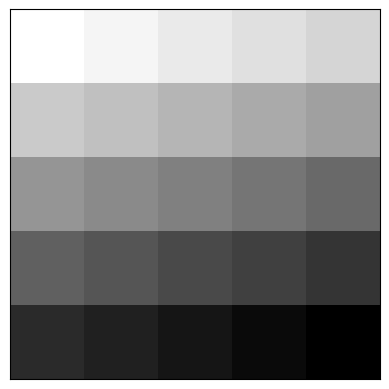

In [18]:
plt.imshow(24-x,cmap=plt.cm.gray)
plt.xticks([])
plt.yticks([])
plt.show()

중앙행만 1이고 나머지는 0인 행렬을 만듭니다.
파이썬은 0부터 출발하기 때문에 2행이 중앙행입니다.

In [27]:
x1=np.zeros((5,5))
x1[2,:]=1
print(x1)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


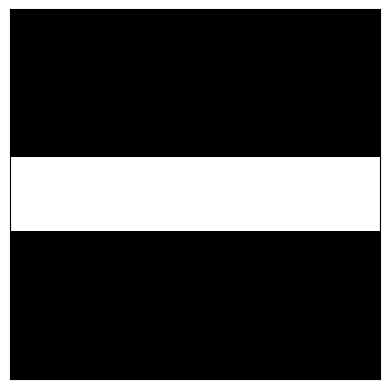

In [28]:
plt.imshow(x1,cmap=plt.cm.gray)
plt.xticks([])
plt.yticks([])
plt.show()

중앙열만 1이고 나머지는 0인 행렬을 만듭니다. 파이썬은 0부터 출발하기 때문에 2열이 중앙열입니다.

In [29]:
x2=np.zeros((5,5))
x2[:,2]=1
print(x2)

[[0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]]


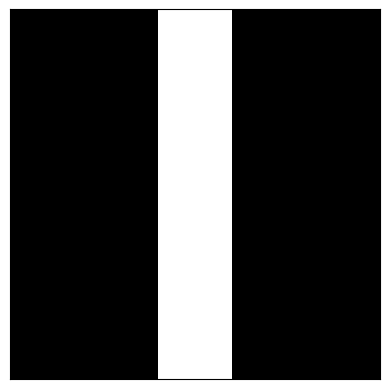

In [30]:
plt.imshow(x2,cmap=plt.cm.gray)
plt.xticks([])
plt.yticks([])
plt.show()

두 행렬을 더합니다.

[[0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 1. 2. 1. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]]


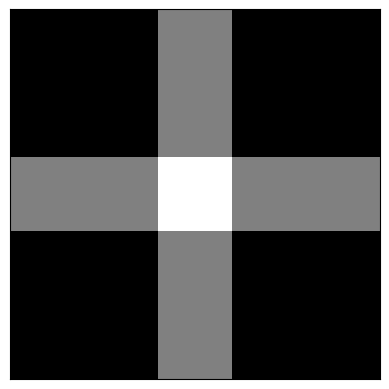

In [37]:
print(x1+x2)

plt.imshow(x1+x2,cmap=plt.cm.gray)
plt.xticks([])
plt.yticks([])
plt.show()

####  훈련데이터의 라벨별 데이터 개수를 출력하는 코드

In [32]:
for i in range(10):
    print(str(i)+'의 개수 : ' + str(np.sum(t_train==i)))

0의 개수 : 5923
1의 개수 : 6742
2의 개수 : 5958
3의 개수 : 6131
4의 개수 : 5842
5의 개수 : 5421
6의 개수 : 5918
7의 개수 : 6265
8의 개수 : 5851
9의 개수 : 5949


### MNIST imshow.py를 수정하여 훈련용 MNIST데이터중 라벨이 2인 데이터 첫 25개를 다음과 같이 출력하시오.
![image.png](attachment:image.png)

라벨이 2인 인덱스를 모은 리스트를 먼저 만듭니다.

In [40]:
N=2
N_index=[]

for k in range(len(x_train)):
    if t_train[k]==N:
        N_index.append(k)

print(N_index)

[5, 16, 25, 28, 76, 82, 109, 117, 120, 122, 143, 159, 161, 171, 178, 180, 187, 189, 190, 199, 213, 220, 233, 252, 253, 262, 268, 277, 308, 317, 318, 325, 339, 347, 360, 365, 375, 378, 381, 385, 390, 391, 400, 410, 432, 444, 448, 457, 472, 476, 477, 493, 515, 530, 548, 551, 555, 558, 563, 568, 570, 584, 588, 591, 619, 642, 646, 650, 657, 664, 673, 674, 684, 688, 693, 696, 713, 714, 716, 732, 774, 801, 807, 813, 814, 830, 844, 854, 862, 863, 866, 873, 893, 907, 917, 931, 938, 946, 989, 1010, 1011, 1033, 1034, 1047, 1048, 1053, 1058, 1074, 1096, 1124, 1129, 1134, 1140, 1143, 1165, 1175, 1183, 1188, 1199, 1213, 1246, 1249, 1255, 1262, 1264, 1270, 1299, 1301, 1330, 1334, 1361, 1374, 1385, 1390, 1391, 1395, 1397, 1407, 1427, 1438, 1444, 1447, 1478, 1492, 1510, 1531, 1539, 1549, 1550, 1558, 1561, 1563, 1572, 1573, 1584, 1595, 1602, 1609, 1614, 1624, 1629, 1648, 1649, 1660, 1662, 1679, 1711, 1714, 1715, 1724, 1727, 1735, 1753, 1754, 1755, 1766, 1774, 1800, 1823, 1841, 1852, 1861, 1874, 1880, 1

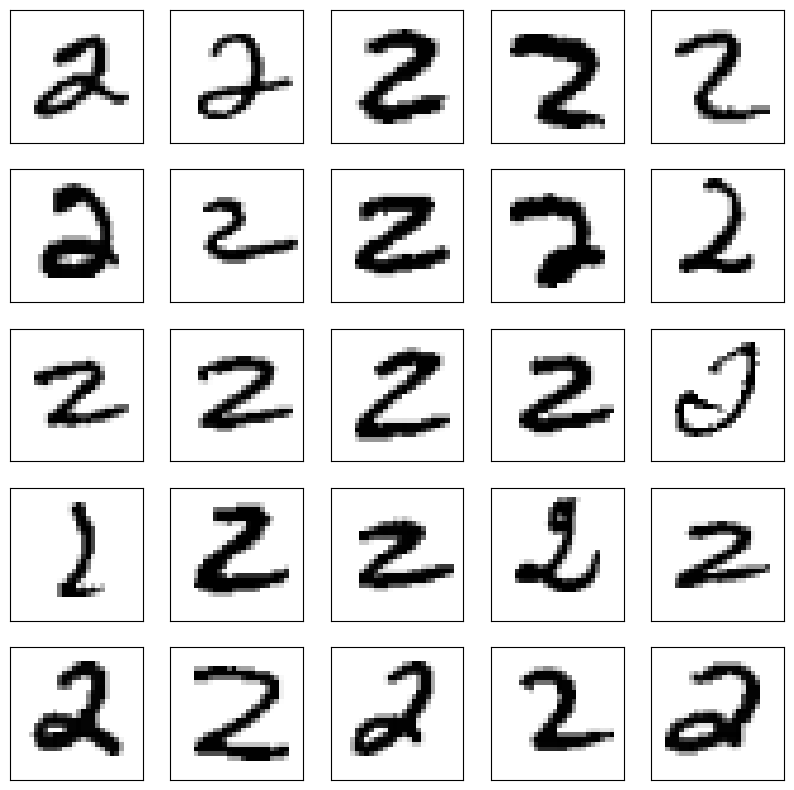

In [41]:
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[N_index[i]][0], cmap=plt.cm.binary)

plt.show()

### MNIST_imshow.py를 수정하여 훈련용 MNIST데이터중 랜덤하게 25개를 뽑아서 5 X5 모아찍기로 출력하시오.

`np.random.choice`를 이용해 인덱스 $0,1,2,\cdots, 59999$w중에서 25개의 숫자를 랜덤하게 뽑습니다.  
랜덤하게 뽑으므로 실행할때마다 뽑히는 인덱스는 달라집니다.

In [38]:
random_index = np.random.choice(len(x_train), 25)
print(random_index)

[42682 42802 47086 58724 15531  1629 33576 47412 29389 58198 20883 31017  7860 54466 25138 38801  7110 48706 23841 25196 32523 52142 46367 45637 57344]


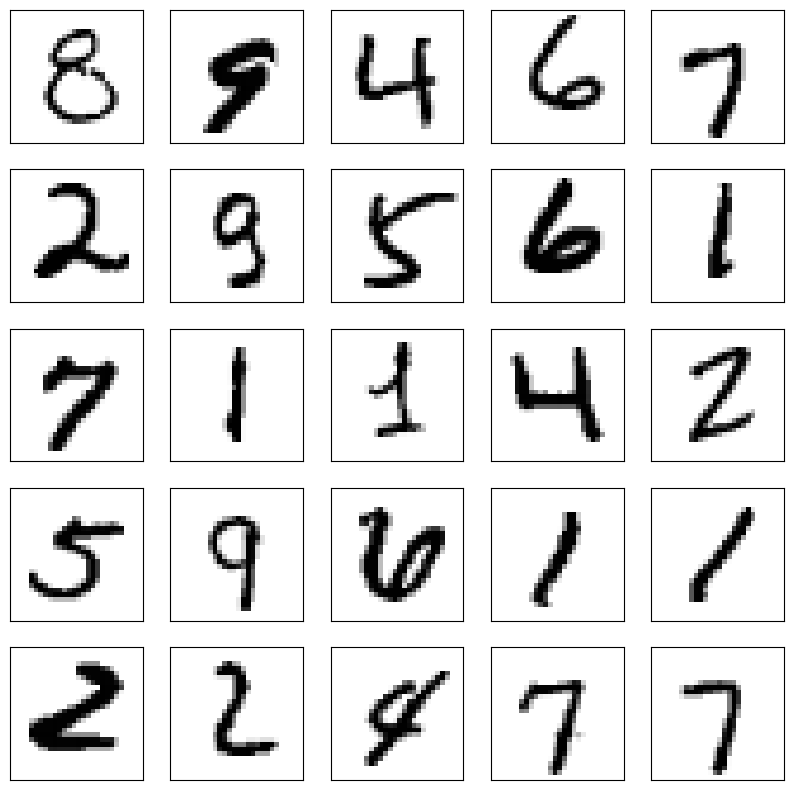

In [39]:
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[random_index[i]][0], cmap=plt.cm.binary)

plt.show()